In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# To import libraries
comp_deaths_hospitals = pd.read_csv("No-missing-score dataframes are in here/Complications and Deaths - Hospital.csv", low_memory=False)
readdmissions = pd.read_csv("No-missing-score dataframes are in here/Readmissions and Deaths - VA_07_10_2018.csv", low_memory=False)
medicare = pd.read_csv("No-missing-score dataframes are in here/Medicare Hospital Spending per Patient - Hospital.csv", low_memory=False)
u_visits = pd.read_csv("No-missing-score dataframes are in here/Unplanned Hospital Visits - Hospital.csv", low_memory=False)

# Data Cleaning

## To narrow each dataframe down to state level, KS and MO

In [7]:
comp_deaths_hospitals_ks_mo = comp_deaths_hospitals[(comp_deaths_hospitals['State']=='KS')|(comp_deaths_hospitals['State']=='MO')]
readdmissions_ks_mo = readdmissions[(readdmissions['State']=='KS')|(readdmissions['State']=='MO')]
medicare_ks_mo = medicare[(medicare['State']=='KS')|(medicare['State']=='MO')]
u_visits_ks_mo = u_visits[(u_visits['State']=='KS')|(u_visits['State']=='MO')]

## To narrow each dataframe down to county level, JACKSON, JOHNSON, CLAY, LEAVENWORTH, WYANDOTTE, SEDGWICK

In [8]:
comp_deaths_hospitals_county = comp_deaths_hospitals_ks_mo[(comp_deaths_hospitals['County Name']=='JACKSON')|
                                               (comp_deaths_hospitals['County Name']=='JOHNSON')|
                                               (comp_deaths_hospitals['County Name']=='CLAY')|
                                               (comp_deaths_hospitals['County Name']=='LEAVENWORTH')|
                                               (comp_deaths_hospitals['County Name']=='SEDGWICK')|
                                               (comp_deaths_hospitals['County Name']=='WYANDOTTE')]

readdmissions_county = readdmissions_ks_mo[(readdmissions['County']=='JACKSON')|
                                    (readdmissions['County']=='JOHNSON')|
                                    (readdmissions['County']=='CLAY')|
                                    (readdmissions['County']=='LEAVENWORTH')|
                                    (readdmissions['County']=='SEDGWICK')|
                                    (readdmissions['County']=='WYANDOTTE')]
                                      
medicare_county = medicare_ks_mo[(medicare['County Name']=='JACKSON')|
                          (medicare['County Name']=='JOHNSON')|
                          (medicare['County Name']=='CLAY')|
                          (medicare['County Name']=='LEAVENWORTH')|
                          (medicare['County Name']=='SEDGWICK')|
                          (medicare['County Name']=='WYANDOTTE')]

u_visits_county = u_visits_ks_mo[(u_visits['County Name']=='JACKSON')|
                          (u_visits['County Name']=='JOHNSON')|
                          (u_visits['County Name']=='CLAY')|
                          (u_visits['County Name']=='LEAVENWORTH')|
                          (u_visits['County Name']=='SEDGWICK')|
                          (u_visits['County Name']=='WYANDOTTE')]

C:\Users\kcmon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\kcmon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\kcmon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kcmon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## To select all columns that seems useful

In [9]:
# Renameing "County" columns to "County Name"
readdmissions_county = readdmissions_county.rename(columns={'County':'County Name'})

In [10]:
comp_deaths_hospitals_county = comp_deaths_hospitals_county[['Provider ID','Hospital Name', 'City',
                                                             'State','County Name', 
                                                             'Measure Name', 'Measure ID',
                                                             'Compared to National', 'Score']]

readdmissions_county = readdmissions_county[['Provider_ID', 'Hospital Name',  'City', 'State',
                                             'County Name', 'Measure Name', 'Measure ID', 'Score']]

medicare_county = medicare_county[['Provider ID', 'Hospital Name', 'City', 'State',
                                   'County Name', 'Measure Name', 'Measure ID', 'Score']]

u_visits_county = u_visits_county[['Provider ID', 'Hospital Name', 'City', 'State', 
                                   'County Name', 'Measure Name', 'Measure ID','Compared to National', 
                                   'Score']]

In [11]:
comp_deaths_hospitals_county.head()

,Provider ID,Hospital Name,City,State,County Name,Measure Name,Measure ID,Compared to National,Score
29089,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,Not Available,2.59
29090,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for heart attack patients,MORT_30_AMI,Number of Cases Too Small,2.59
29091,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for CABG surgery patients,MORT_30_CABG,Not Available,2.59
29092,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for COPD patients,MORT_30_COPD,No Different than the National Rate,7.1
29093,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for heart failure patients,MORT_30_HF,No Different than the National Rate,10.1


## To take care of missing scores

### To calculate average scores based on county for missing score values

In [12]:
# Converting object(data type) to numeric
# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
comp_deaths_hospitals_county['Score'] = comp_deaths_hospitals_county['Score'].apply(pd.to_numeric, errors = 'coerce')
readdmissions_county['Score'] = readdmissions_county['Score'].apply(pd.to_numeric, errors = 'coerce')
medicare_county['Score'] = medicare_county['Score'].apply(pd.to_numeric, errors = 'coerce')
u_visits_county['Score'] = u_visits_county['Score'].apply(pd.to_numeric, errors = 'coerce')

In [13]:
# Calculating mean and median Score by counties
comp_deaths_hospitals_score_mean = comp_deaths_hospitals_county.groupby(by='County Name')['Score'].mean()
comp_deaths_hospitals_score_median = comp_deaths_hospitals_county.groupby(by='County Name')['Score'].median()

readdmissions_group_mean = readdmissions_county.groupby(by='County Name')['Score'].mean()
readdmissions_group_median = readdmissions_county.groupby(by='County Name')['Score'].median()

medicare_score_mean = medicare_county.groupby(by='County Name')['Score'].mean()
medicare_score_median = medicare_county.groupby(by='County Name')['Score'].median()

u_visits_score_mean = u_visits_county.groupby(by='County Name')['Score'].mean()
u_visits_score_median = u_visits_county.groupby(by='County Name')['Score'].median()

In [14]:
comp_deaths_score_summary = pd.DataFrame([comp_deaths_hospitals_score_mean,
                                          comp_deaths_hospitals_score_median], index=['Mean', 'Median'])
comp_deaths_score_summary = comp_deaths_score_summary.transpose()

readdmissions_score_summary = pd.DataFrame([readdmissions_group_mean,
                                            readdmissions_group_median], index=['Mean', 'Median'])
readdmissions_score_summary = readdmissions_score_summary.transpose()

medicare_score_summary = pd.DataFrame([medicare_score_mean,
                                       medicare_score_median], index=['Mean', 'Median'])
medicare_score_summary = medicare_score_summary.transpose()

u_visits_score_summary = pd.DataFrame([u_visits_score_mean,
                                       u_visits_score_median], index=['Mean', 'Median'])
u_visits_score_summary = u_visits_score_summary.transpose()


In [15]:
# Display Dataframe side by side for improving readbility

In [16]:
# # df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))

# def comp_deaths_median_socre(cols):
#     Score = cols[0]
#     County_Name = cols[1]
    
#     if County_Name == 'JACKSON':
#          if Score == 'NaN':
#             return 2.980
#     elif County_Name == 'JOHNSON':
#         if Score == 'NaN':
#             return 2.560
#     elif County_Name == 'CLAY':
#         if Score == 'NaN':
#             return 3.430
#     elif County_Name == 'LEAVENWORTH':
#         if Score == 'NaN':
#             return 2.590
#     elif County_Name == 'SEDGWICK':
#         if Score == 'NaN':
#             return 2.280
#     elif County_Name == 'WYANDOTTE':
#         if Score == 'NaN':
#             return 2.985
#     else:
#         return 'Score'

# comp_deaths_hospitals_county['Score'] = (comp_deaths_hospitals_county[['Score', 'County Name']]
#                                         .apply(comp_deaths_median_socre, axis = 1))


## To create columns for average income and median income

### Average income and median income

In [17]:
avg_income = {'Jackson ':47419,
             'Johnson ':68334,
             'Clay ':60438,
             'Wyandotte ':34533,
             'Leavenworth ':65328,
             'Sedgwick':48670}

median_income = {'Jackson ':50652,
                'Johnson ':81121,
                'Clay ':65675,
                'Wyandotte ':42783,
                'Leavenworth ':70022,
                'Sedgwick':52841}

### To create columns with null value

In [18]:
comp_deaths_hospitals_county['Avg Income'] = np.nan
readdmissions_county['Avg Income'] = np.nan
medicare_county['Avg Income'] = np.nan
u_visits_county['Avg Income'] = np.nan

In [19]:
comp_deaths_hospitals_county['Median Income'] = np.nan
readdmissions_county['Median Income'] = np.nan
medicare_county['Median Income'] = np.nan
u_visits_county['Median Income'] = np.nan

### To create a function and replace null values with average income according to County

In [20]:
# Function to replace null values
def impute_avg_income(cols):
    Avg_Income = cols[0]
    County_Name = cols[1]
    
    if County_Name == 'JACKSON':
        return 47419
    elif County_Name == 'JOHNSON':
        return 68334
    elif County_Name == 'CLAY':
        return 60438
    elif County_Name == 'LEAVENWORTH':
        return 65328
    elif County_Name == 'SEDGWICK':
        return 486470
    else:
        return 34533
    
def impute_median_income(cols):
    Median_Income = cols[0]
    County_Name = cols[1]
    
    if County_Name == 'JACKSON':
        return 50652
    elif County_Name == 'JOHNSON':
        return 81121
    elif County_Name == 'CLAY':
        return 65675
    elif County_Name == 'LEAVENWORTH':
        return 70022
    elif County_Name == 'SEDGWICK':
        return 52841
    else:
        return 42783

### To apply the function to "Avg Income" and "Median Income" columns

In [21]:
comp_deaths_hospitals_county['Avg Income'] = (comp_deaths_hospitals_county[['Avg Income', 'County Name']]
                                              .apply(impute_avg_income, axis=1))

readdmissions_county['Avg Income'] = (readdmissions_county[['Avg Income', 'County Name']]
                                      .apply(impute_avg_income, axis=1))

medicare_county['Avg Income'] = (medicare_county[['Avg Income', 'County Name']]
                                 .apply(impute_avg_income, axis=1))

u_visits_county['Avg Income'] = (u_visits_county[['Avg Income', 'County Name']]
                                 .apply(impute_avg_income, axis=1))

In [22]:
comp_deaths_hospitals_county['Median Income'] = (comp_deaths_hospitals_county[['Median Income', 'County Name']]
                                                 .apply(impute_median_income, axis=1))

readdmissions_county['Median Income'] = (readdmissions_county[['Median Income', 'County Name']]
                                         .apply(impute_median_income, axis=1))

medicare_county['Median Income'] = (medicare_county[['Median Income', 'County Name']]
                                    .apply(impute_median_income, axis=1))

u_visits_county['Median Income'] = (u_visits_county[['Median Income', 'County Name']]
                                    .apply(impute_median_income, axis=1))

## Scaling Score

In [23]:
comp_deaths_hospitals_county.head(2)

,Provider ID,Hospital Name,City,State,County Name,Measure Name,Measure ID,Compared to National,Score,Avg Income,Median Income
29089,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,Not Available,2.59,65328,70022
29090,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for heart attack patients,MORT_30_AMI,Number of Cases Too Small,2.59,65328,70022


In [24]:
plt.scatter(x='Score', y='Median Income', data=comp_deaths_hospitals_county)
plt.title('Average Income vs Score \n Complications and Deaths')
plt.ylabel('Average Income')
plt.xlabel('Score')


Text(0.5, 23.52222222222222, 'Score')

In [25]:
plt.scatter(x='Avg Income', y='Score', data=comp_deaths_hospitals_county)

In [26]:
readmit_min = readdmissions_county[["County_Name", "Measure Name", "Measure ID", "Compare to National", "Denominator", "Score", "Lower Estimate", "Higher Estimate"]]
medi_min = medicare_county[["County Name", "Measure Name", "Measure ID", "Score"]]
u_min = u_visits_county[["County Name", "Measure Name", "Measure ID", "Compared to National", "Denominator", "Score", "Lower Estimate", "Higher Estimate" ]]

u_min.head()

KeyError: "['County_Name' 'Compare to National' 'Denominator' 'Lower Estimate'\n 'Higher Estimate'] not in index"

In [27]:
# readmit_min, u_min, medi_min
# readmit_min = readmit_min.rename(columns={"County":"County Name"})
# merge_alpha = pd.merge(readmit_min, medi_min, on=["County Name"], suffixes=(" Readmission", " Medicare"))
# merge_one = pd.merge(merge_alpha, u_min, on=["County Name"], suffixes=(" Readmission", " Unexpected Visit"))
# merge_one.head(10)

In [28]:
kansas = [559836, 503438, 179060, 8523, ]

## Graph - Income by County

<IPython.core.display.Javascript object>


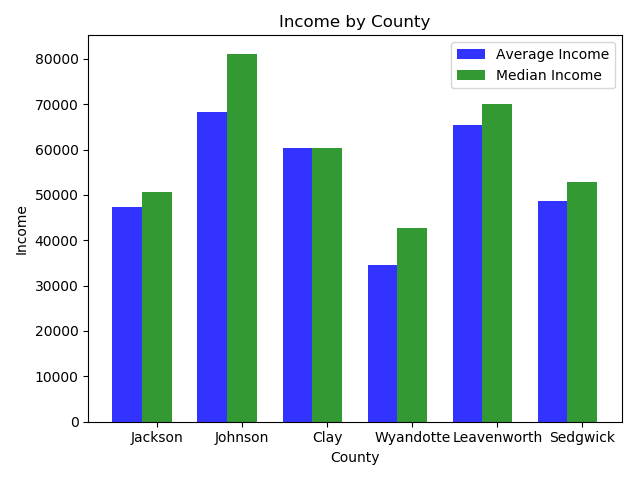

In [34]:
%matplotlib notebook


# data to plot
n_groups = 6
average_income = (47419, 68334, 60438, 34533, 65328, 48670)
median_income =  (50652, 81121, 60438, 42783, 70022, 52841)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
avg_inc = plt.bar(index, average_income, bar_width,
alpha=opacity,
color='b',
label='Average Income')
 
med_inc = plt.bar(index + bar_width, median_income, bar_width,
alpha=opacity,
color='g',
label='Median Income')
 
plt.xlabel('County')
plt.ylabel('Income')
plt.title('Income by County')
plt.xticks(index + bar_width, ('Jackson', 'Johnson', 'Clay', 'Wyandotte', 'Leavenworth', 'Sedgwick'))
plt.legend()
 
plt.tight_layout()
plt.savefig("income by county.png")
plt.show()

## Graph - County Avg Score

<IPython.core.display.Javascript object>


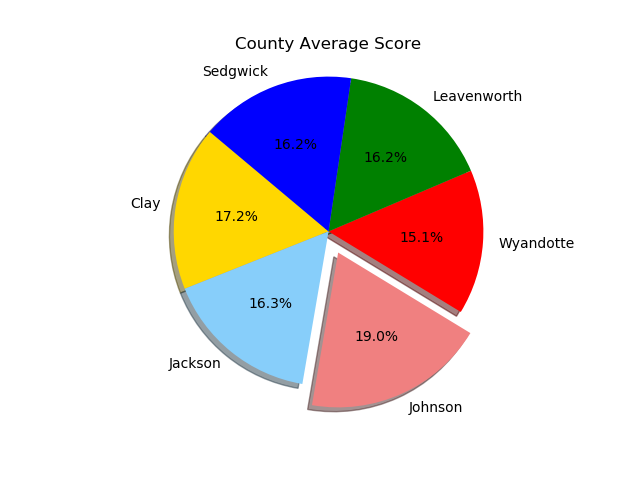

In [35]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ['Clay', 'Jackson', 'Johnson', 'Wyandotte', 'Leavenworth', 'Sedgwick' ]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral", "r", "g", "b"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .15, 0, 0, 0)


# Creates the pie chart
# Automatically finds the percentages of each part of the pie chart

plt.title("County Average Score", fontsize = 12)
plt.pie(medicare_score_mean, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Pie County Avg Score.png")

# Show Figure
plt.show()

## Graph - (Bar) - Health System Performance

<IPython.core.display.Javascript object>


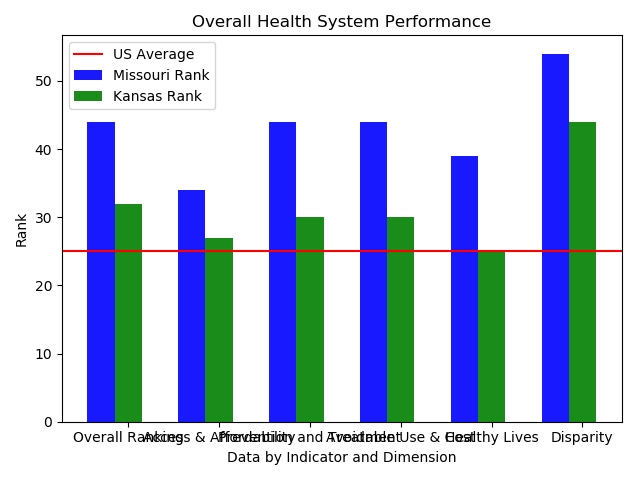

In [31]:
%matplotlib notebook

#import matplotlib.pyplot as plt

n_groups = 6
missouri_rank = (44, 34, 44, 44, 39, 54)
kansas_rank =  (32, 27, 30, 30, 25, 44)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.9
 
mo_rank = plt.bar(index, missouri_rank, bar_width, alpha=opacity, color='b', label='Missouri Rank')
 
ks_rank = plt.bar(index + bar_width, kansas_rank, bar_width, alpha=opacity,color='g',label='Kansas Rank')
 
plt.xlabel('Data by Indicator and Dimension')
plt.ylabel('Rank')
plt.title('Overall Health System Performance')
plt.axhline(25, color='r', label='US Average')
plt.xticks(index + bar_width, ('Overall Ranking', 'Access & Affordability', 'Prevention and Treatment',
                               'Avoidable Use & Cost', 'Healthy Lives', 'Disparity'))
plt.legend()
plt.tight_layout()

plt.savefig("Bar Heath System Performance.png")

plt.show()

## Graph (Scatter) - Health System Performance

<IPython.core.display.Javascript object>


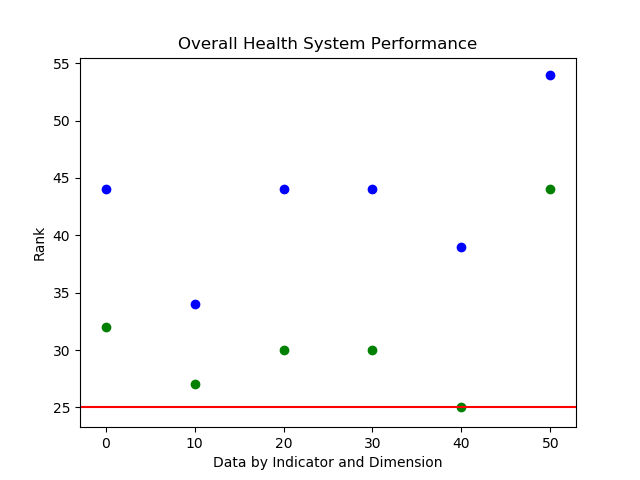

In [36]:
import matplotlib.pyplot as plt

mo_ranks = [44, 34, 44, 44, 39, 54]
ks_ranks = [32, 27, 30, 30, 25, 44]
range = [0, 10, 20, 30, 40,50]
fig, ax = plt.subplots()
plt.axhline(25, color='r', label='US Average')
plt.scatter(range,mo_ranks, color='b')
plt.scatter(range, ks_ranks, color='g')
plt.title('Overall Health System Performance')
plt.xlabel('Data by Indicator and Dimension')
plt.ylabel('Rank')
plt.savefig("Scatter Heath System Performance.png")
plt.show()
